# Fully Connected Neural Network with SGD Optimizer (TF2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets, models

## Data Preparing (Training Set: 50000; VC Set: 10000; Testing Set: 10000)

In [ ]:
(x_train,y_train), (x_test,y_test) = datasets.mnist.load_data()

In [ ]:
x_train = x_train.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [ ]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:50000]
y_train = y_train[:50000]

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

Using TensorFlow backend.


In [ ]:
print('Size of Training data:', x_train.shape, "|", "Size of Training labels:", y_train.shape)
print('Size of VC data:', x_val.shape, "|", "Size of VC labels:", y_val.shape)
print('Size of Testing data:', x_test.shape, "|", "Size of Testing labels:", y_test.shape)

Size of Training data: (50000, 784) | Size of Training labels: (50000, 10)
Size of VC data: (10000, 784) | Size of VC labels: (10000, 10)
Size of Testing data: (10000, 784) | Size of Testing labels: (10000, 10)


In [ ]:
print(y_train)
print(len(y_train))
print(len(y_train[0]))

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
50000
10


## Model Setting and Training

In [ ]:
fcdn = models.Sequential([layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
                             layers.Dense(128, activation='relu'),
                             layers.Dense(10, activation='softmax')])

In [ ]:
fcdn.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
import datetime
# create TensorBoard
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
history = fcdn.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val), callbacks=[tensorboard_callback])

Epoch 1/15
782/782 [==============================] - 4s 5ms/step - loss: 0.8565 - accuracy: 0.7950 - val_loss: 0.3857 - val_accuracy: 0.8989
Epoch 2/15
782/782 [==============================] - 4s 5ms/step - loss: 0.3643 - accuracy: 0.9009 - val_loss: 0.2973 - val_accuracy: 0.9187
Epoch 3/15
782/782 [==============================] - 4s 5ms/step - loss: 0.3016 - accuracy: 0.9153 - val_loss: 0.2629 - val_accuracy: 0.9245
Epoch 4/15
782/782 [==============================] - 4s 5ms/step - loss: 0.2680 - accuracy: 0.9244 - val_loss: 0.2400 - val_accuracy: 0.9316
Epoch 5/15
782/782 [==============================] - 4s 5ms/step - loss: 0.2431 - accuracy: 0.9313 - val_loss: 0.2173 - val_accuracy: 0.9385
Epoch 6/15
782/782 [==============================] - 4s 5ms/step - loss: 0.2239 - accuracy: 0.9368 - val_loss: 0.2078 - val_accuracy: 0.9406
Epoch 7/15
782/782 [==============================] - 4s 5ms/step - loss: 0.2076 - accuracy: 0.9410 - val_loss: 0.1917 - val_accuracy: 0.9474
Epoch 

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

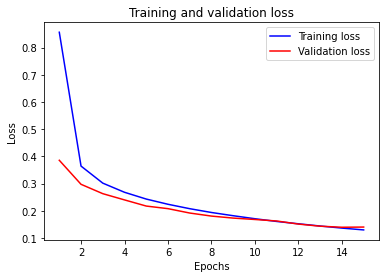

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'b', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

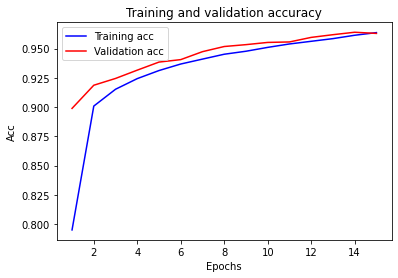

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

## Prediction

In [ ]:
test_loss, test_acc = fcdn.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 1s 3ms/step - loss: 0.1418 - accuracy: 0.9575


In [ ]:
print('test_acc:', test_acc)
print('test_loss:', test_loss)

test_acc: 0.9574999809265137
test_loss: 0.14181406795978546


In [ ]:
import numpy as np

test_labels_result = [np.argmax(y_test[i]) for i in range(len(y_test))]
    
test_labels_result = np.array(test_labels_result)
test_labels_result

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
test_predict = fcdn.predict(x_test)
test_predict_result = [np.argmax(test_predict[i]) for i in range(len(test_predict))]
    
test_predict_result = np.array(test_predict_result)
test_predict_result

array([7, 2, 1, ..., 4, 5, 6])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


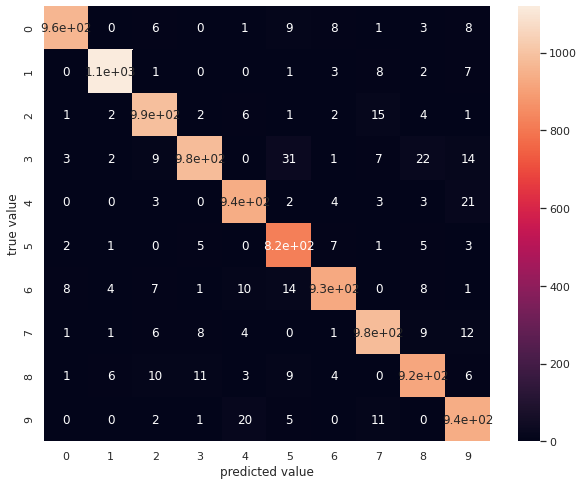

In [ ]:
import seaborn as sns; sns.set()

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(test_predict_result, test_labels_result)

plt.figure(figsize=(10,8))
sns.heatmap(mat, square=False, annot=True, cbar=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

## Tensorboard

Show the TensorBoard

In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard
%tensorboard --logdir logs

Clear the TensorBoard

In [ ]:
# !rm -rf ./logs/